In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




In [30]:
dataset = pd.read_csv('winequalityN.csv')
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, -1].values

In [31]:
print(y)

[6 6 6 ... 6 5 6]


In [32]:
print(X)

[[7.    0.27 ]
 [6.3   0.3  ]
 [8.1   0.28 ]
 ...
 [6.3   0.51 ]
 [5.9   0.645]
 [6.    0.31 ]]


In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [35]:
print(X_train)

[[7.   0.34]
 [6.4  0.42]
 [7.8  0.53]
 ...
 [7.9  0.33]
 [8.9  0.26]
 [7.9  0.51]]


In [36]:
print(y_test)

[6 6 5 ... 5 6 6]


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
print(X_train)

[[-0.17252094  0.00153725]
 [-0.63314438  0.48243172]
 [ 0.44164365  1.14366162]
 ...
 [ 0.51841422 -0.05857456]
 [ 1.28611995 -0.47935722]
 [ 0.51841422  1.02343801]]


In [39]:
print(y_test)

[6 6 5 ... 5 6 6]


In [40]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
print(y_pred)

[6 5 6 ... 6 6 5]


In [43]:
print(y_test)

[6 6 5 ... 5 6 6]


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   0   2   4   0   0]
 [  1   2  18  38   0   0]
 [  3   2 146 402   0   0]
 [  4   1  77 609   0   0]
 [  1   0  13 254   0   0]
 [  0   0   5  42   0   0]]


<ipython-input-46-505e1dc696ed>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


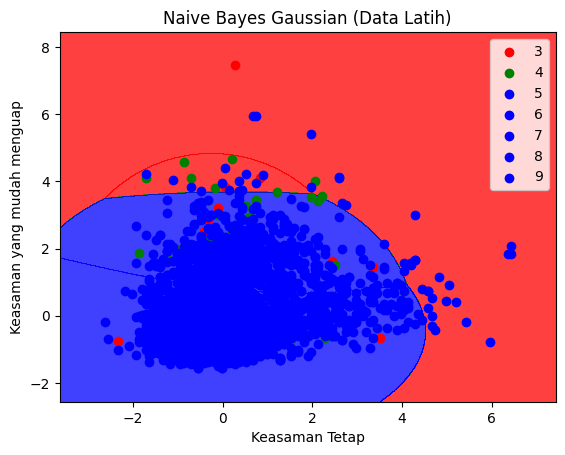

In [46]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Naive Bayes Gaussian (Data Latih)')
plt.xlabel('Keasaman Tetap')
plt.ylabel('Keasaman yang mudah menguap')
plt.legend()
plt.show()


<ipython-input-47-81a58af75170>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


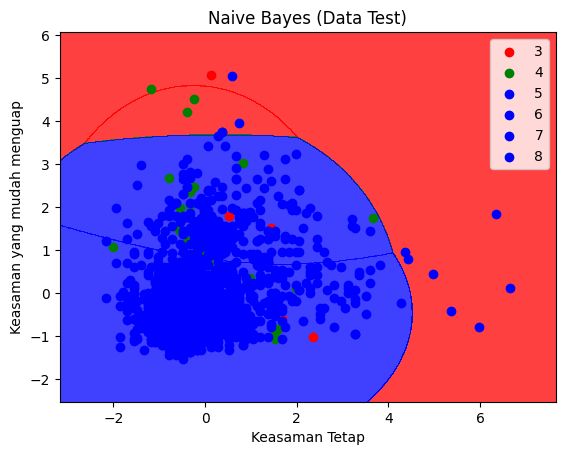

In [47]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Naive Bayes (Data Test)')
plt.xlabel('Keasaman Tetap')
plt.ylabel('Keasaman yang mudah menguap')
plt.legend()
plt.show()